__Contents:__

__auto-sklearn:__ Failed as can't access lib<br>
__Wrapper to boost Algo:__ As per above<br>
__Ensembles testing: GPT:__ tested numerous (bag, boost, etc.) Good results, but can't get feat imp. also check overfitting<br>
__Ensembles testing (plus overfit check):__ Hands-on ML with Scikitlearn, Keras & Tensorflow: Ensembles + overfitting<br>
__Optimim no trees + early stopping:__ Hands-on ML with Scikitlearn, Keras & Tensorflow: Ensembles + overfitting<br>
__Learning Curve:__ Simple code + explaination<br>
__Random CV:__ Very re-usable Random CV with df out<br>
__CV + hype & CV vs RepeatedStrat CV:__ Believe should have use for small imbalanced data (i.e. Super)<br>
__Scatter Matrix:__ Is this an alternative to pairs plot?<br>
__Simple RF Feat Imp:__ Very re-usable feat imp<br>
__Visulise tree splits:__ Perhaps needs work, but could be good<br>
__Visuals range:__ Range of visuals code<br>

__Other notebook that has a lot of new code:__ the investigation notebook for Super

In [1]:
import numpy as np # linear algebra"
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [3]:
import os as os
os.chdir(r'/Users/adma748/OneDrive - Bendigo and Adelaide Bank/Documents/Desktop/CIA/LENz/Qlik/Data Inl KML for all sub & TA Access/4. 3rd Party Mortgages/DataScience/3. Other/2.MLTraining/2.Kaggle/1.0 TT')
os.getcwd()

'/Users/adma748/Library/CloudStorage/OneDrive-BendigoandAdelaideBank/Documents/Desktop/CIA/LENz/Qlik/Data Inl KML for all sub & TA Access/4. 3rd Party Mortgages/DataScience/3. Other/2.MLTraining/2.Kaggle/1.0 TT'

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# DATA PREPROCESSING - Skipped EDA

In [5]:
#Check null values
#train_data.isnull().sum()

# HANDLE MISSING VALUES OF AGE COLUMN
mean = train_data["Age"].mean()
std = train_data["Age"].std()
rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice
train_data["Embarked"].fillna(value="C", inplace=True)
# Again checking for null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# DROP COL
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train_data.drop(col_to_drop, axis=1, inplace=True)
#train_data.head(10)

In [7]:
#CONVERTING CATEGORICAL VARIABLES TO NUMERIC
genders = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(genders)
ports = {"S":0, "C":1, "Q":2}
train_data["Embarked"] = train_data["Embarked"].map(ports)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# BUILDING MACHINE LEARNING MODEL

In [8]:
### Lets shuffle and see if it changes anything...
### ----------------------------------------------
train_data_shuffle = train_data.sample(frac = 1, random_state=42)
### ----------------------------------------------

df_train_x_shuffle = train_data_shuffle[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# Target variable column
df_train_y_shuffle = train_data_shuffle['Survived']
# Train Test Splitting
x_train_shuffle, x_test_shuffle, y_train_shuffle, y_test_shuffle = \
train_test_split(df_train_x_shuffle, df_train_y_shuffle, test_size=0.20, random_state=42)

#-----//-----//-----//-----//-----//-----//-----

# RANDOM FOREST
# Creating alias for Classifier
model_shuffled = RandomForestClassifier(random_state=42)
# Fitting the model using training data
model_shuffled = model_shuffled.fit(x_train_shuffle, y_train_shuffle)
# Predicting on test data
rfc_y_pred_shuffle = model_shuffled.predict(x_test_shuffle)
# Calculating Accuracy to compare all models
rfc_accuracy_shuffle = accuracy_score(y_test_shuffle, rfc_y_pred_shuffle) * 100
print("accuracy=",rfc_accuracy_shuffle)

accuracy= 77.6536312849162


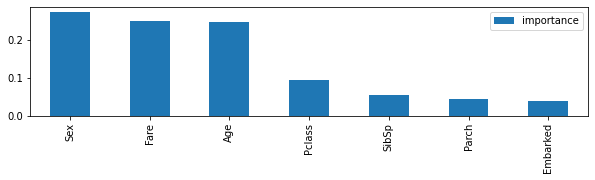

In [9]:
### Feat importance of SHUFFLE
# Supervised ML Book
# Simple, clean feat imp
feat_imps = pd.DataFrame({'importance': model_shuffled.feature_importances_}, index=x_train_shuffle.columns) 
feat_imps.sort_values(by='importance', ascending=False, inplace=True) 
feat_imps.plot(kind='bar', figsize=(10,2)) 
plt.legend() 
plt.show()

In [10]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# Target variable column
df_train_y = train_data['Survived']
# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42, shuffle=True)

In [11]:
# RANDOM FOREST
# Creating alias for Classifier
model1 = RandomForestClassifier(random_state=42)
# Fitting the model using training data
model1 = model1.fit(x_train, y_train)
# Predicting on test data
rfc_y_pred = model1.predict(x_test)
# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 82.68156424581005


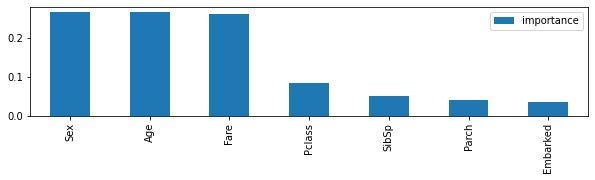

In [12]:
### Feat importance of Non-SHUFFLE
# Refer to later in NB for original use
feat_imps = pd.DataFrame({'importance': model1.feature_importances_}, index=x_train.columns) 
feat_imps.sort_values(by='importance', ascending=False, inplace=True) 
feat_imps.plot(kind='bar', figsize=(10,2)) 
plt.legend() 
plt.show()

In [13]:
# LOGISTIC REGRESSION
model2 = LogisticRegression( max_iter=2000 )
model2 = model2.fit(x_train, y_train)
lr_y_pred = model2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100
print("accuracy=",lr_accuracy)

accuracy= 80.44692737430168


In [14]:
# K-NEIGHBOR CLASSIFIER
model3 = KNeighborsClassifier(5)
model3 = model3.fit(x_train, y_train)
knc_y_pred = model3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100
print("accuracy=",knc_accuracy)

accuracy= 68.15642458100558


In [15]:
# DECISSION TREE CLASSIFIER
model4 = tree.DecisionTreeClassifier()
model4 = model4.fit(x_train, y_train)
dtc_y_pred = model4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100
print("accuracy=",dtc_accuracy)

accuracy= 75.97765363128491


In [16]:
# SUPPORT VECTOR MACHINE
model5 = svm.SVC()
model5 = model5.fit(x_train, y_train)
svm_y_pred = model5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


# ACCURACY SCORES OF All CLASSIFIERS

In [17]:
print("Accuracy of RANDOM FOREST CLASSIFIER =",rfc_accuracy)
print("Accuracy of LOGISTIC REGRESSION      =",lr_accuracy)
print("Accuracy of K-NEIGHBOR CLASSIFIER    =",knc_accuracy)
print("Accuracy of DECISION TREE CLASSIFIER =",dtc_accuracy)
print("Accuracy of SUPPORT VECTOR MACHINE   =",svm_accuracy,'\n')

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
print('RANDOM FOREST')
print('precision:', precision_score(y_test,rfc_y_pred))
print('recall   :', recall_score(y_test,rfc_y_pred))
print('recall   :', recall_score(y_test,rfc_y_pred,average=None))
print('f1       :', f1_score(y_test,rfc_y_pred),'\n')

print('LOGISTIC REGRESSION')
print('precision:', precision_score(y_test,lr_y_pred))
print('recall   :', recall_score(y_test,lr_y_pred))
print('recall   :', recall_score(y_test,lr_y_pred,average=None))
print('f1       :', f1_score(y_test,lr_y_pred),'\n')

print('K-NEIGHBOR CLASSIFIER')
print('precision:', precision_score(y_test,knc_y_pred))
print('recall   :', recall_score(y_test,knc_y_pred))
print('recall   :', recall_score(y_test,knc_y_pred,average=None))
print('f1       :', f1_score(y_test,knc_y_pred),'\n')

print('DECISSION TREE CLASSIFIER')
print('precision:', precision_score(y_test,dtc_y_pred))
print('recall   :', recall_score(y_test,dtc_y_pred))
print('recall   :', recall_score(y_test,dtc_y_pred,average=None))
print('f1       :', f1_score(y_test,dtc_y_pred),'\n')

print('SUPPORT VECTOR MACHINE')
print('precision:', precision_score(y_test,svm_y_pred))
print('recall   :', recall_score(y_test,svm_y_pred))
print('recall   :', recall_score(y_test,svm_y_pred,average=None))
print('f1       :', f1_score(y_test,svm_y_pred),'\n')

Accuracy of RANDOM FOREST CLASSIFIER = 79.3296089385475
Accuracy of LOGISTIC REGRESSION      = 80.44692737430168
Accuracy of K-NEIGHBOR CLASSIFIER    = 68.15642458100558
Accuracy of DECISION TREE CLASSIFIER = 75.97765363128491
Accuracy of SUPPORT VECTOR MACHINE   = 65.36312849162012 

RANDOM FOREST
precision: 0.7605633802816901
recall   : 0.7297297297297297
recall   : [0.83809524 0.72972973]
f1       : 0.7448275862068966 

LOGISTIC REGRESSION
precision: 0.7746478873239436
recall   : 0.7432432432432432
recall   : [0.84761905 0.74324324]
f1       : 0.7586206896551724 

K-NEIGHBOR CLASSIFIER
precision: 0.6440677966101694
recall   : 0.5135135135135135
recall   : [0.8        0.51351351]
f1       : 0.5714285714285714 

DECISSION TREE CLASSIFIER
precision: 0.7066666666666667
recall   : 0.7162162162162162
recall   : [0.79047619 0.71621622]
f1       : 0.7114093959731544 

SUPPORT VECTOR MACHINE
precision: 0.75
recall   : 0.24324324324324326
recall   : [0.94285714 0.24324324]
f1       : 0.367346

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>auto-sklearn: Source: packt</strong></p>

The following wrapper functions will process input data and run experiments using auto-classification or auto-regression algorithms of auto-sklearn:

In [18]:
# #Function below will encode the target variable if needed
# def encode_target_variable(df=None, target_column=None, y=None):

#     # Below section will encode target variable if given data is pandas dataframe
#     if df is not None:
#         df_type = isinstance(df, pd.core.frame.DataFrame)

#         # Splitting dataset as train and test data sets
#         if df_type:

#             # If column data type is not numeric then labels are encoded
#             if not np.issubdtype(df[target_column].dtype, np.number):
#                 le = preprocessing.LabelEncoder()
#                 df[target_column] = le.fit_transform(df[target_column])
#                 return df[target_column]

#             return df[target_column]
#     # Below section will encode numpy array.
#     else:

#         # numpy array's data type is not numeric then labels are encoded
#         if not np.issubdtype(y.dtype, np.number):
#             le = preprocessing.LabelEncoder()
#             y = le.fit_transform(y)
#             return y

#         return y


# # Create a wrapper function where you can specify the type of learning problem
# X_train = x_train.copy()
# X_test = x_test.copy()
# y_train = y_train.copy()
# X_test = y_test.copy()
# X = df_train_x
# y = df_train_y

# def supervised_learner(type, X_train, y_train, X_test, y_test):

#     if type == 'regression':
#         # You can play with time related arguments for discovering more pipelines
#         automl = AutoSklearnRegressor(time_left_for_this_task=7200, per_run_time_limit=720)
#     else:
#         automl = AutoSklearnClassifier(time_left_for_this_task=7200, per_run_time_limit=720)

#     # Training estimator based on learner type
#     automl.fit(X_train, y_train)

#     # Predicting labels on test data
#     y_hat = automl.predict(X_test)

#     # Calculating accuracy_score
#     metric = accuracy_score(y_test, y_hat)

#     # Return model, labels and metric
#     return automl, y_hat, metric

# # In function below, you need to provide numpy array or pandas dataframe together with the name of the target column as arguments
# def supervised_automl(data, target_column=None, type=None, y=None):

#     # First thing is to check whether data is pandas dataframe
#     df_type = isinstance(data, pd.core.frame.DataFrame)

#     # Based on data type, you will split dataset as train and test data sets
#     if df_type:
#         # This is where encode_target_variable function is used before data split
#         data[target_column] = encode_target_variable(data, target_column)
#         X_train, X_test, y_train, y_test = \
#             train_test_split(data.loc[:, data.columns != target_column], data[target_column], random_state=1)
#     else:
#         y_encoded = encode_target_variable(y=y)
#         X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1)

#     # If learner type is given, then you invoke supervied_learner
#     if type != None:
#         automl, y_hat, metric = supervised_learner(type, X_train, y_train, X_test, y_test)

#     # If type of learning problem is not given, you need to infer it
#     # If there are more than 10 unique numerical values, problem will be treated as regression problem,
#     # Otherwise, classification problem

#     elif len(df[target_column].unique()) > 10:
#             print("""There are more than 10 uniques numerical values in target column. 
#             Treating it as regression problem.""")
#             automl, y_hat, metric = supervised_learner('regression', X_train, y_train, X_test, y_test)
#     else:
#         automl, y_hat, metric = supervised_learner('classification', X_train, y_train, X_test, y_test)

#     # Return model, labels and metric
#     return automl, y_hat, metric

You can now run it to see the results:

In [19]:
# # FAILED TO PIP AUTO-SKLEARN
# #automl, y_hat, metric = supervised_automl(df, target_column='Survived')

# from autosklearn.classification import AutoSklearnClassifier
# df = train_data.copy()
# automl, y_hat, metric = supervised_automl(df, target_column='Survived')

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Wrapper to boost Algo: packt</strong></p>

In [20]:
# #An example system
# #In this section, you will write a wrapper function to optimize the XGBoost algorithm hyperparameters to improve performance on the Breast Cancer Wisconsin dataset:

# from smac.facade.func_facade import fmin_smac

# # Importing necessary libraries
# import numpy as np
# from xgboost import XGBClassifier
# from sklearn import datasets
# from sklearn.model_selection import cross_val_score

# # Importing ConfigSpace and different types of parameters
# from smac.configspace import ConfigurationSpace
# from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
#     UniformFloatHyperparameter, UniformIntegerHyperparameter
# from ConfigSpace.conditions import InCondition

# # Import SMAC-utilities
# from smac.tae.execute_func import ExecuteTAFuncDict
# from smac.scenario.scenario import Scenario
# from smac.facade.smac_facade import SMAC

# # Creating configuration space.
# # Configuration space will hold all of your hyperparameters
# cs = ConfigurationSpace()

# # Defining hyperparameters and range of values that they can take
# learning_rate = UniformFloatHyperparameter("learning_rate", 0.001, 0.1, default_value=0.1)
# n_estimators = UniformIntegerHyperparameter("n_estimators", 100, 200, default_value=100)

# # Adding hyperparameters to configuration space
# cs.add_hyperparameters([learning_rate, n_estimators])

# # Loading data set
# #wbc_dataset = datasets.load_breast_cancer()

# # Creating function to cross validate XGBoost classifier given the configuration space
# def xgboost_from_cfg(cfg):
#     """ Creates a XGBoost based on a configuration and evaluates it on the
#     Wisconsin Breast Cancer-dataset using cross-validation.

#     Parameters:
#     -----------
#     cfg: Configuration (ConfigSpace.ConfigurationSpace.Configuration)
#         Configuration containing the parameters.
#         Configurations are indexable!
#     Returns:
#     --------
#     A crossvalidated mean score for the svm on the loaded data-set.
#     """

#     cfg = {k: cfg[k] for k in cfg if cfg[k]}

#     clf = XGBClassifier(**cfg, eval_metric='auc', early_stopping_rounds=50, random_state=42)

#     scores = cross_val_score(clf, wbc_dataset.data, wbc_dataset.target, cv=5)

#     return 1 - np.mean(scores) # Minimize!


# # Creating Scenario object
# scenario = Scenario({"run_obj": "quality",
#                      "runcount-limit": 200, # maximum function evaluations
#                      "cs": cs, # configuration space
#                      "deterministic": "true"
#                      })



# # SMAC object handles bayesian optimization loop
# print("Please wait until optimization is finished")
# smac = SMAC(scenario=scenario, rng=np.random.RandomState(42),
#         tae_runner=xgboost_from_cfg)

# incumbent = smac.optimize()

# # Let's see the best performing hyperparameter values
# print(incumbent)
# # Configuration:
# # learning_rate, Value: 0.08815217130807515
# # n_estimators, Value: 196

# # You can see the errpr rate of optimized hyperparameters
# inc_value = xgboost_from_cfg(incumbent)

# print("Optimized Value: %.2f" % (inc_value))
# # 0.02

In [21]:
#### Scores to beat...
print("Accuracy of RANDOM FOREST CLASSIFIER =",rfc_accuracy)
print("Accuracy of LOGISTIC REGRESSION      =",lr_accuracy)
print("Accuracy of K-NEIGHBOR CLASSIFIER    =",knc_accuracy)
print("Accuracy of DECISION TREE CLASSIFIER =",dtc_accuracy)
print("Accuracy of SUPPORT VECTOR MACHINE   =",svm_accuracy)

Accuracy of RANDOM FOREST CLASSIFIER = 79.3296089385475
Accuracy of LOGISTIC REGRESSION      = 80.44692737430168
Accuracy of K-NEIGHBOR CLASSIFIER    = 68.15642458100558
Accuracy of DECISION TREE CLASSIFIER = 75.97765363128491
Accuracy of SUPPORT VECTOR MACHINE   = 65.36312849162012


<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Ensembles testing: GPT</strong></p>

In [22]:
from sklearn.svm import SVC 
# Instantiate the individual models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Instantiate the individual models
model1 = LogisticRegression(max_iter=2000,random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = SVC(random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Predict using the ensemble model
ensemble_y_pred = ensemble_model.predict(x_test)
ensemble_accuracy = accuracy_score(y_test,ensemble_y_pred)*100
print("Accuracy of ensemble.                =",ensemble_accuracy)
print('precision:', precision_score(y_test,ensemble_y_pred))
print('recall   :', recall_score(y_test,ensemble_y_pred))
print('recall   :', recall_score(y_test,ensemble_y_pred,average=None))
print('f1       :', f1_score(y_test,ensemble_y_pred),'\n')

Accuracy of ensemble.                = 78.2122905027933
precision: 0.7868852459016393
recall   : 0.6486486486486487
recall   : [0.87619048 0.64864865]
f1       : 0.711111111111111 



In [23]:
### Bagging...
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base model
base_model = DecisionTreeClassifier()

# Instantiate the bagging model
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50)

# Fit the bagging model on the training data
bagging_model.fit(x_train, y_train)

# Predict using the bagging model
bag_y_pred = bagging_model.predict(x_test)
bag_accuracy = accuracy_score(y_test,bag_y_pred)*100
print("Accuracy of bag_accuracy             =",bag_accuracy)
print("Accuracy of ensemble.                =",ensemble_accuracy)
print('precision:', precision_score(y_test,bag_y_pred))
print('recall   :', recall_score(y_test,bag_y_pred))
print('recall   :', recall_score(y_test,bag_y_pred,average=None))
print('f1       :', f1_score(y_test,bag_y_pred),'\n')

Accuracy of bag_accuracy             = 77.6536312849162
Accuracy of ensemble.                = 78.2122905027933
precision: 0.7236842105263158
recall   : 0.7432432432432432
recall   : [0.8        0.74324324]
f1       : 0.7333333333333334 



In [24]:
### Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base model
base_model = DecisionTreeClassifier()

# Instantiate the boosting model
boosting_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50)

# Fit the boosting model on the training data
boosting_model.fit(x_train, y_train)

# Predict using the boosting model
boost_y_pred = boosting_model.predict(x_test)
boost_accuracy = accuracy_score(y_test,boost_y_pred)*100
print("Accuracy of boost_accuracy           =",boost_accuracy)
print('precision:', precision_score(y_test,boost_y_pred))
print('recall   :', recall_score(y_test,boost_y_pred))
print('recall   :', recall_score(y_test,boost_y_pred,average=None))
print('f1       :', f1_score(y_test,boost_y_pred),'\n')

Accuracy of boost_accuracy           = 74.30167597765363
precision: 0.675
recall   : 0.7297297297297297
recall   : [0.75238095 0.72972973]
f1       : 0.7012987012987014 



In [25]:
### Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Instantiate the base models
model1 = LogisticRegression(max_iter=2000)
model2 = DecisionTreeClassifier()
model3 = SVC()

# Instantiate the meta model
meta_model = LogisticRegression(max_iter=2000)

# Create the stacking model
stacking_model = StackingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], final_estimator=meta_model)

# Fit the stacking model on the training data
stacking_model.fit(x_train, y_train)

# Predict using the stacking model
stack_y_pred = stacking_model.predict(x_test)
stack_accuracy = accuracy_score(y_test,stack_y_pred)*100
print("Accuracy of stack_accuracy           =",stack_accuracy)
print('precision:', precision_score(y_test,stack_y_pred))
print('recall   :', recall_score(y_test,stack_y_pred))
print('recall   :', recall_score(y_test,stack_y_pred,average=None))
print('f1       :', f1_score(y_test,stack_y_pred),'\n')

Accuracy of stack_accuracy           = 79.3296089385475
precision: 0.7761194029850746
recall   : 0.7027027027027027
recall   : [0.85714286 0.7027027 ]
f1       : 0.7375886524822697 



<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Ensembles testing (plus overfit check): New book</strong></p> <br>
#### this ensemble outscored the others, so worth keeping in the arsenal<br>
#### Would be happy to play around with more, but now want to try the next thing

In [26]:
dt_params = { 'criterion': 'entropy', 'random_state': 42 } 
dt = DecisionTreeClassifier(**dt_params) 
bc_params = {'base_estimator':dt,'n_estimators':50,'max_samples':.5,'random_state':42,'n_jobs':-1 } 
bc = BaggingClassifier(**bc_params)
# Fit bagging on training data  get accuracy.
# Fit bagging to get meta predictions for both training + validation.
# Following this, let's find the prediction accuracy on the training and validation datasets:

bc.fit(x_train, y_train) 
bc_preds_train = bc.predict(x_train) 
bc_preds_val = bc.predict(x_test) 
print('Bagging Classifier on training:', accuracy_score(y_train, bc_preds_train))
print('Bagging Classifier on test    :', accuracy_score(y_test, bc_preds_val))

print('precision:', precision_score(y_test,bc_preds_val))
print('recall   :', recall_score(y_test,bc_preds_val))
print('recall   :', recall_score(y_test,bc_preds_val,average=None))
print('f1       :', f1_score(y_test,bc_preds_val),'\n')

Bagging Classifier on training: 0.925561797752809
Bagging Classifier on test    : 0.8100558659217877
precision: 0.803030303030303
recall   : 0.7162162162162162
recall   : [0.87619048 0.71621622]
f1       : 0.7571428571428571 



In [27]:
dt_params = { 'criterion': 'entropy', 'random_state': 42 } 
#dt = DecisionTreeClassifier(**dt_params) 
#dt = RandomForestClassifier(**dt_params) 
from sklearn.ensemble import ExtraTreesClassifier
dt = ExtraTreesClassifier(**dt_params) 
bc_params = {'base_estimator':dt,'n_estimators':50,'max_samples':.5,'random_state':42,'n_jobs':-1 } 
bc = BaggingClassifier(**bc_params)


bc.fit(x_train, y_train) 
bc_preds_train = bc.predict(x_train) 
bc_preds_val = bc.predict(x_test) 
print('Bagging Classifier on training:', accuracy_score(y_train, bc_preds_train))
print('Bagging Classifier on test    :', accuracy_score(y_test, bc_preds_val))

print('precision:', precision_score(y_test,bc_preds_val))
print('recall   :', recall_score(y_test,bc_preds_val))
print('recall   :', recall_score(y_test,bc_preds_val,average=None))
print('f1       :', f1_score(y_test,bc_preds_val),'\n')

Bagging Classifier on training: 0.9269662921348315
Bagging Classifier on test    : 0.8100558659217877
precision: 0.803030303030303
recall   : 0.7162162162162162
recall   : [0.87619048 0.71621622]
f1       : 0.7571428571428571 



Adaptive Boosting:
> Accuracy on training data = 0.8427
> Accuracy on validation data = 0.7989


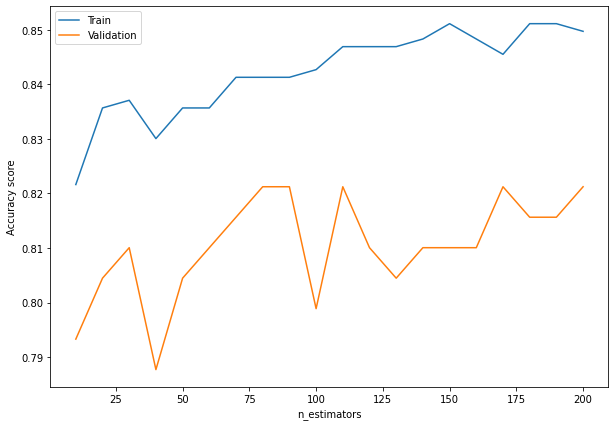

In [28]:
### Trying a new algo, but same concept from book
## - This one also looks a overfitting comparison between trian and test.
dt_params = { 'max_depth': 1, 'random_state': 11 }
dt = DecisionTreeClassifier(**dt_params) 
ab_params = { 'n_estimators': 100, 'base_estimator': dt, 'random_state': 42}
ab = AdaBoostClassifier(**ab_params)

#Fit the model to the training data. Let's fit the AdaBoost model and find the meta predictions for both the training and validation set. Following this, let's find the prediction accuracy on the training and validation datasets:
ab.fit(x_train, y_train)
ab_preds_train = ab.predict(x_train)
ab_preds_val = ab.predict(x_test)

print('Adaptive Boosting:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format( accuracy_score(y_true=y_train, y_pred=ab_preds_train), accuracy_score(y_true=y_test, y_pred=ab_preds_val) ))
# Let's calculate the prediction accuracies so that we can find the point where the model begins to overfit the training data:
ab_params = { 'base_estimator': dt, 'random_state': 42 }
n_estimator_values = list(range(10, 210, 10)) 
train_accuracies, val_accuracies = [], []
for n_estimators in n_estimator_values:
    ab = AdaBoostClassifier(n_estimators=n_estimators, **ab_params)
    ab.fit(x_train, y_train) 
    ab_preds_train = ab.predict(x_train)
    ab_preds_val = ab.predict(x_test)
    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=ab_preds_train))
    val_accuracies.append(accuracy_score(y_true=y_test, y_pred=ab_preds_val))

# Plot a line graph to visualize the trend of the prediction accuracies on both the training and validation datasets:
plt.figure(figsize=(10,7)) 
plt.plot(n_estimator_values, train_accuracies, label='Train') 
plt.plot(n_estimator_values, val_accuracies, label='Validation') 
plt.ylabel('Accuracy score') 
plt.xlabel('n_estimators') 
plt.legend() 
plt.show()

Gradient Boosting Classifier:
> Accuracy on training data = 0.9017
> Accuracy on validation data = 0.8101


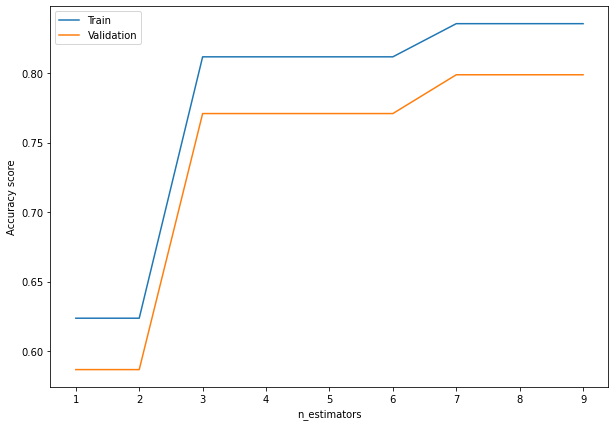

In [29]:
#### Another one from same part of book, but outscored above in book
### - Outscored here too
from sklearn.ensemble import GradientBoostingClassifier
gbc_params = { 'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 5, 'random_state': 11 } 
gbc = GradientBoostingClassifier(**gbc_params)
gbc.fit(x_train, y_train)
gbc_preds_train = gbc.predict(x_train)
gbc_preds_val = gbc.predict(x_test)
print('Gradient Boosting Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format( accuracy_score(y_true=y_train, y_pred=gbc_preds_train), accuracy_score(y_true=y_test, y_pred=gbc_preds_val) ))


# -----//-----//-----//-----//-----//-----//-----//----- Can i get this (from above) working here also? 
# -----//-----//-----//-----//-----//-----//-----//----- This confirms ths code can be reused anywhere
gbc_params = {'random_state': 42 }
#n_estimator_values = list(range(10, 210, 10)) 
n_estimator_values = list(range(1, 10, 1)) 
train_accuracies, val_accuracies = [], []
for n_estimators in n_estimator_values:
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, **gbc_params)
    gbc.fit(x_train, y_train) 
    gbc_preds_train = gbc.predict(x_train)
    gbc_preds_val = gbc.predict(x_test)
    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=gbc_preds_train))
    val_accuracies.append(accuracy_score(y_true=y_test, y_pred=gbc_preds_val))

# Plot a line graph to visualize the trend of the prediction accuracies on both the training and validation datasets:
plt.figure(figsize=(10,7)) 
plt.plot(n_estimator_values, train_accuracies, label='Train') 
plt.plot(n_estimator_values, val_accuracies, label='Validation') 
plt.ylabel('Accuracy score') 
plt.xlabel('n_estimators') 
plt.legend() 
plt.show()

__Hands-on ML with Scikitlearn, Keras & Tensorflow__
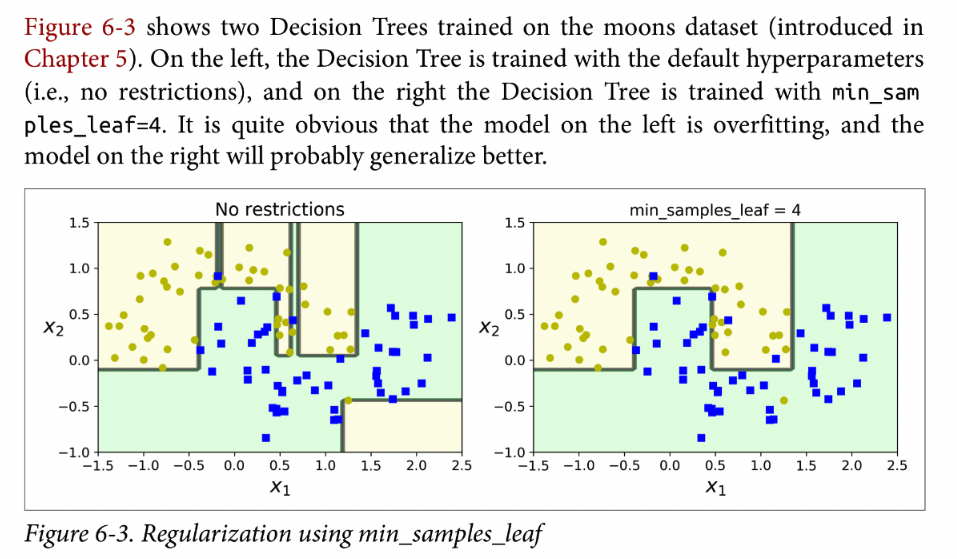

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Optimim no trees + early stopping: Hands-on ML with Scikitlearn, Keras & Tensorflow</strong></p> <br>

In [30]:
# Not working... could fix if desired, but might leave atm See email from Timbosss 18/02
# There is also a 2nd email with alternate approach (will leave, same as above)
# Will try the 3rd approach now...
# from sklearn.metrics import accuracy_score
# gbc1 = GradientBoostingClassifier(max_depth=2,n_estimators=120)
# gbc1.fit(x_train, y_train)

# errors = [accuracy_score(y_test, y_pred)
#          for y_pred in gbc1.staged_predict(x_test)]
# bst_n_estimators = np.argmin(errors)

# gbc1_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators)
# gbc1_best.fit(x_train, y_train)
# preds_gbc1 = gbc1.predict(x_train) 

# print('precision:', precision_score(y_test,preds_gbc1))
# print('recall   :', recall_score(y_test,preds_gbc1))
# print('recall   :', recall_score(y_test,preds_gbc1,average=None))
# print('f1       :', f1_score(y_test,preds_gbc1),'\n')

# 3rd Approach... Pro: looks simple, Con: might only work for XGB (if want beyond XGB, rever to above) 
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, early_stopping_rounds=2)
xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)])
y_pred = xgb.predict(x_test)

print('accuracy :', accuracy_score(y_test,y_pred))
print('precision:', precision_score(y_test,y_pred))
print('recall   :', recall_score(y_test,y_pred))
print('recall   :', recall_score(y_test,y_pred,average=None))
print('f1       :', f1_score(y_test,y_pred),'\n')

[0]	validation_0-logloss:0.56870
[1]	validation_0-logloss:0.50104
[2]	validation_0-logloss:0.46767
[3]	validation_0-logloss:0.44547
[4]	validation_0-logloss:0.43401
[5]	validation_0-logloss:0.42868
[6]	validation_0-logloss:0.42753
[7]	validation_0-logloss:0.42489
[8]	validation_0-logloss:0.42925
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.42113
[11]	validation_0-logloss:0.41989
[12]	validation_0-logloss:0.41972
[13]	validation_0-logloss:0.42058
[14]	validation_0-logloss:0.41901
[15]	validation_0-logloss:0.42285
[16]	validation_0-logloss:0.42654
accuracy : 0.8268156424581006
precision: 0.8524590163934426
recall   : 0.7027027027027027
recall   : [0.91428571 0.7027027 ]
f1       : 0.7703703703703704 



In [39]:
### Another source for early stopping...
# https://www.kaggle.com/code/tunguz/adversarial-ieee/notebook
import lightgbm as lgb
param = {'num_leaves': 50,
         'min_data_in_leaf': 30, 
         'objective':'binary',
         'max_depth': 5,
         'learning_rate': 0.2,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 44,
         "metric": 'auc',
         "verbosity": -1}
num_round = 2
clf = lgb(param, x_train, num_round, valid_sets = [x_test, y_test], verbose_eval=50, early_stopping_rounds = 50)
#clf = lgb.LGBMClassifier(param=param, verbose_eval=50, early_stopping_rounds = 2)
clf.fit(x_train, y_train, eval_set=[(x_test, y_test)])


# xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)])
# y_pred = xgb.predict(x_test)

# print('accuracy :', accuracy_score(y_test,y_pred))
# print('precision:', precision_score(y_test,y_pred))
# print('recall   :', recall_score(y_test,y_pred))
# print('recall   :', recall_score(y_test,y_pred,average=None))
# print('f1       :', f1_score(y_test,y_pred),'\n')

TypeError: 'module' object is not callable

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Learning Curve R5 Super</strong></p> <br>

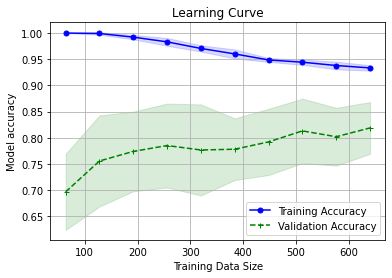

In [14]:
# R5 (Super)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt


# Use learning curve to get training and test scores along with train sizes
train_sizes, train_scores, test_scores = learning_curve(estimator=gbc, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# The shadow around the Val line...
# plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
# - Uses fill_between from Matplotlib, which takes in four positional arguments:
# - 1. train_sizes: An array of x-values that represents the training set sizes.
# - 2. test_mean + test_std: An array of y-values that represents the upper boundary of the shaded area.
# - 3. test_mean - test_std: An array of y-values that represents the lower boundary of the shaded area.
# - 4. alpha: A float between 0 and 1 that represents the transparency level of the shaded area.
# Purpose: Plot variance of test set scores. 
# Shaded area indicates range of poss scores i.e.
# get a sense of how well the model is generalising to new data and how sensative it is to variations in data

__Supervised learning text book...__<br>
__Lightbulb, explanaintion from same book:__ Reading chart left to right...<br>
__- Training Data:__ show with very few samples of data, 'training accuracy' is high as model can fit them perfectly (hence 100% acc). But as new instances added, it becomes impossible to fit them all perfectly (hence acc dropping), hopefully until a point where it plateau's at which point adding further data is pointless.<br> 
__- Test Data:__ it shows with very few samples of data, model is incapable of generalizing properly (hence poor acc). As model sees more data, it learns (hence acc improves) & this improvement can be tracks relative to the amount of data shown (does start to decline, plateau, or keep increasing?)<br>


__Supervised learning text book...__<br>
__Validation curves allow us to find the ideal point between an underfitted and an overfitted model where the model would generalize well.__ <br>
__Left plot:__ shows two curves converging to error value that is quite high (i.e. model has high bias) & adding more data isn't likely to affect the model performance. So instead of wasting time/money collecting more data, best action is to increase model complexity.<br>
__Right plot:__ high difference between training & test errors (even with an increasing data). Wide gap indicates a high variance (overfitting). Here, aadding more data points will probably help the model generalize better:
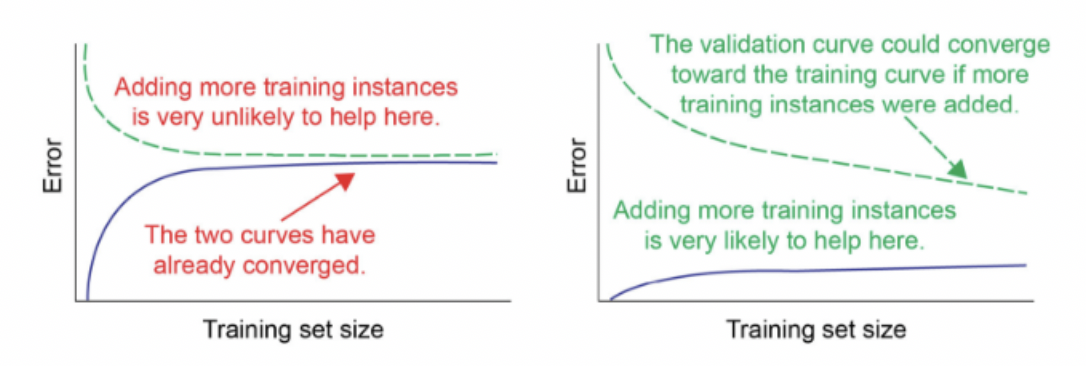<br>

__Addtional reading:__ https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Random CV</strong></p> 

In [43]:
# Supervised ML Book
# Exercise 53: Hyperparameter Tuning with Random Search Using scikit-learn's RandomizedSearchCV method, we can define a grid of hyperparameter ranges and randomly sample from the grid, performing K-fold cross-validation with each combination of values. In this exercise, we'll perform hyperparameter tuning with the random search method:

from sklearn.model_selection import RandomizedSearchCV

rf_rand = RandomForestClassifier()
#Specify the parameters to sample from. 
# Here, we will list down the different values for each hyperparameter that we would like to have in the grid:
param_dist = {"n_estimators": list(range(10,210,10)), \
              "max_depth": list(range(3,20)), "max_features": list(range(1, 10)),\
              "min_samples_split": list(range(2, 11)), "bootstrap": [True, False], \
              "criterion": ["gini", "entropy"]}

# Run a randomized search. 
# We initialize the random search object with the total number of trials we want to run, 
# the parameter values dictionary, scoring function, and no folds in the K-fold cross-val.

n_iter_search = 60
random_search = RandomizedSearchCV(rf_rand, param_distributions=param_dist, scoring='accuracy', n_iter=n_iter_search, cv=5)
random_search.fit(x_train, y_train)

# Print scores & hype for top five models.
# Convert results dictionary into a DF
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score') 
#for i, row in results.head().iterrows(): 
#    print("Model rank: {}".format(row.rank_test_score)) 
#    print("Mean validation score: {:.3f} (std: {:.3f})".format(row.mean_test_score, row.std_test_score)) 
#    print("Model Hyperparameters: {}\n".format(row.params))
# Why print, when can have in DF?
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.084074,0.001485,0.006955,0.000253,80,2,4,6,entropy,True,"{'n_estimators': 80, 'min_samples_split': 2, '...",0.825175,0.860140,0.838028,0.816901,0.838028,0.835654,0.014644,1
35,0.123197,0.002385,0.009925,0.000323,120,5,4,5,entropy,True,"{'n_estimators': 120, 'min_samples_split': 5, ...",0.832168,0.860140,0.823944,0.809859,0.852113,0.835645,0.018358,2
23,0.031751,0.000308,0.003291,0.000020,30,2,3,8,entropy,True,"{'n_estimators': 30, 'min_samples_split': 2, '...",0.825175,0.860140,0.823944,0.830986,0.816901,0.831429,0.015038,3
55,0.105009,0.000235,0.007479,0.000127,80,9,9,11,entropy,True,"{'n_estimators': 80, 'min_samples_split': 9, '...",0.832168,0.839161,0.802817,0.845070,0.830986,0.830040,0.014530,4
53,0.159595,0.003186,0.014377,0.000341,170,10,3,9,entropy,False,"{'n_estimators': 170, 'min_samples_split': 10,...",0.832168,0.846154,0.802817,0.830986,0.838028,0.830031,0.014629,5


<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>CV + hype & CV vs RepeatedStrat CV</strong></p> 

In [45]:
# CV with Hyperparam tuning...
# Compare this to below - Repeated CV
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

# Define the hyperparameter search space
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l2']}

# Define the model and the CV scheme
model = LogisticRegression(max_iter=3000, random_state=42)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Perform the grid search
grid_search = GridSearchCV(model, param_grid, cv=kfold)
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best CV score: 0.7977503912363068


In [46]:
# CV
# Compare this to below - Repeated CV
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = x_train
y = y_train

# prepare the cross-validation procedure
KFold = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression(max_iter=3000, random_state=42)

scores_acc = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
scores_rec = cross_val_score(model, X, y, scoring='recall', cv=kfold, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('Recall: %.3f (%.3f)' % (mean(scores_rec), std(scores_rec)))

Accuracy: 0.794 (0.050)
Recall: 0.676 (0.058)


In [26]:
# Repeated CV
# Came across this in book (https://drive.google.com/file/d/1_AKtAmr9AuMic_YA38l_Ytj4dkrh_WYe/view)
# Code there a bit fancy, so below code from... https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# evaluate a logistic regression model using repeated k-fold cross-validation

# Realised this is REPEATED, but it is loosing the STRATIFIED, which is important.
# Searched and found this... sklearn.model_selection.RepeatedStratifiedKFold
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X = x_train
y = y_train

# Define the model and the CV scheme ... Now using REPEATED STRATIFIED
model = LogisticRegression(max_iter=3000, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores_acc = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_rec = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('Recall: %.3f (%.3f)' % (mean(scores_rec), std(scores_rec)))


#### - Trying something from new book, p 92 (below is extract, but might need to integrate code from above)
#### - Can add a confusion matrix onto the end of the above code.
y_train_pred = cross_val_predict(model, X, y)#, cv=3)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_pred, y_train))
print('Accuracy:', (381+183)/(381+85+63+183)) # Double checking accuracy
print('Recall  :', 183/(63+183)) # Double checking recall... Not sure why this no match

Accuracy: 0.792 (0.041)
Recall: 0.675 (0.071)


NameError: name 'cross_val_predict' is not defined

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Scatter matrix (alternative to Pairs Plot)</strong></p> <br>

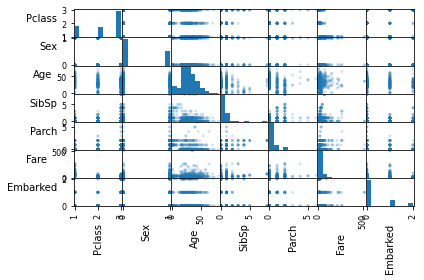

In [27]:
# Scatter Matrix - Similar output, but WAY faster than pais plot.
# Came across this in book (https://drive.google.com/file/d/1_AKtAmr9AuMic_YA38l_Ytj4dkrh_WYe/view)
# Note: can create a list of feat and pass that, i.e.
#feat = ['col1', 'col2', etc.]
#scatter_matrix(x_train[feat], figsize=(12,8))

#from pandas.plotting import scatter_matrix
#scatter_matrix(x_train, figsize=(12,8));

# duplicate of above, but rotating axes
# https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut

axes = pd.plotting.scatter_matrix(x_train, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

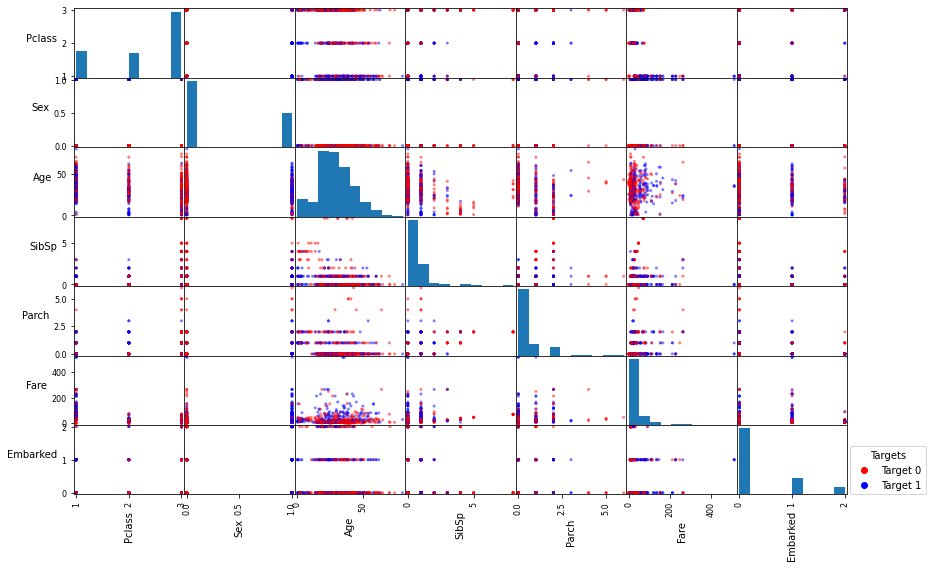

In [28]:
# Can i add target and hue?
# Merge of Chat + above
test = x_train.copy()
test['t'] = y_train

colors = ['red', 'blue']  # Define colors for targets
axes = pd.plotting.scatter_matrix(test.iloc[:,:-1], diagonal='hist', c=test['t'].apply(lambda x: colors[x]), alpha=0.5, figsize=(12,8))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
handles = [plt.plot([],[],marker="o", ls="", color=color, label=f'Target {i}')[0] for i, color in enumerate(colors)]
#plt.show()
plt.legend(handles=handles, title='Targets', loc=(1.02,0))

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Simple RF Feat Imp</strong></p> <br>

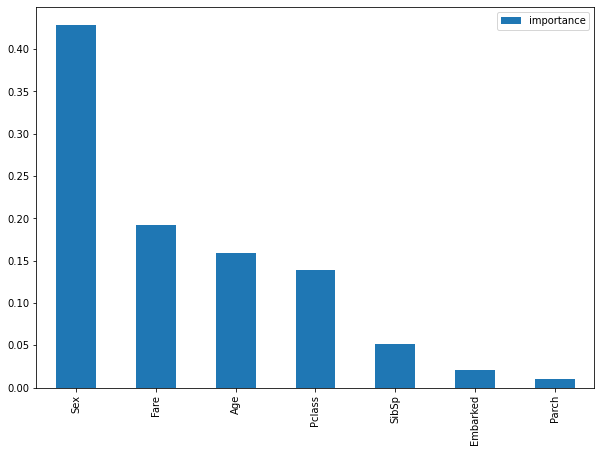

In [36]:
# Supervised ML Book
# Simple, clean feat imp
feat_imps = pd.DataFrame({'importance': gbc.feature_importances_}, index=x_train.columns) 
feat_imps.sort_values(by='importance', ascending=False, inplace=True) 
feat_imps.plot(kind='bar', figsize=(10,7)) 
plt.legend() 
plt.show()

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Visulise tree splits</strong></p> <br>
###### single features at a time:  https://stackabuse.com/bytes/plot-decision-boundaries-using-python-and-scikit-learn/ <br>
###### all features at a time      :  https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

In [66]:
x_train.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,0,45.5,0,0,28.5,0


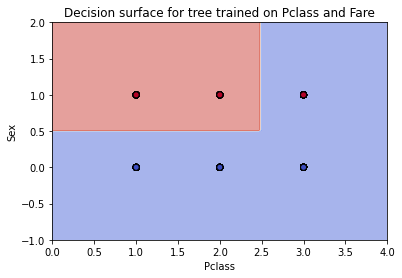

In [68]:
# https://stackabuse.com/bytes/plot-decision-boundaries-using-python-and-scikit-learn/
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the first 2 columns for the plot
#X_train_cols = x_train[['Pclass','Fare']]
#X_train_cols = x_train.iloc[:, [0, 5]] # Pclass + Fare 
X_train_cols = x_train.iloc[:, [0, 1]] # Pclass + Sex 

# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              #xlabel=x_train.columns[0], ylabel=x_train.columns[5],
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
# Plotting the data points    
disp.ax_.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.title(f"Decision surface for tree trained on {x_train.columns[0]} and {x_train.columns[5]}")
plt.show()

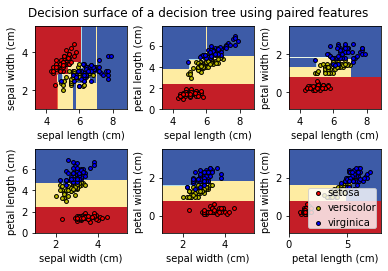

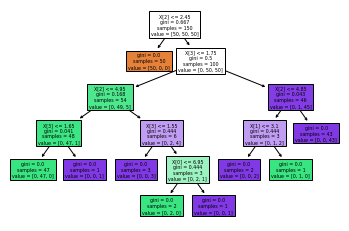

In [1]:
# Still need to get this going....
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

(-0.5800000000000001, 80.98000000000008, -1.0, 8.98000000000001)

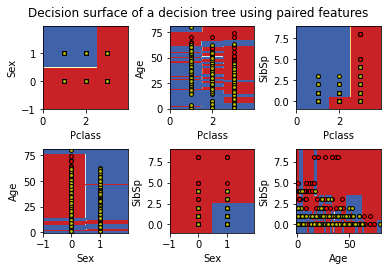

In [39]:
# sepal width, petal length, petal width, sepal length
# Works.... Don't mess with
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


# -----//-----//-----//----- Changes
# Load data
#iris = load_iris()
test = x_train.to_numpy()
test
iris.feature_names = x_train.columns
#iris.target_names = y_train.values()
# -----//-----//-----//----- Changes

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
    X = test[:, pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    #plt.xlabel(iris.feature_names[pair[0]])
    #plt.ylabel(iris.feature_names[pair[1]])
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
          

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                    #label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15) 

plt.suptitle("Decision surface of a decision tree using paired features")
#plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

(-0.5800000000000001, 80.98000000000008, -1.0, 6.9800000000000075)

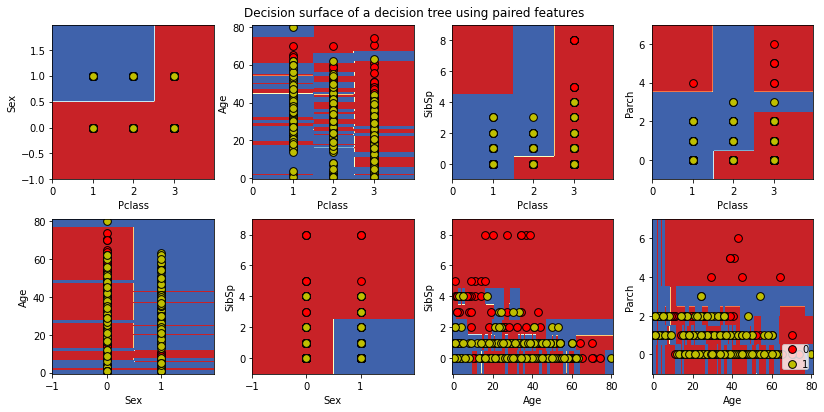

In [58]:
# sepal width, petal length, petal width, sepal length
# Experiment with more
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02


# -----//-----//-----//----- Changes
# Load data
#iris = load_iris()
test = x_train.to_numpy()
test
iris.feature_names = x_train.columns
iris.target_names = [0, 1]
# -----//-----//-----//----- Changes

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [0, 4],
                                [1, 2], [1, 3], [2, 3], [2, 4]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
    X = test[:, pair]
    y = y_train

    # Train
    #clf = DecisionTreeClassifier()
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    #plt.xlabel(iris.feature_names[pair[0]])
    #plt.ylabel(iris.feature_names[pair[1]])
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
          

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                    label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=60) 

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

In [22]:
## Below validates above... (sometimes by fine margins)
qa_above = x_train.copy()
qa_above['t'] = y_train
#qa_above = qa_above[['Parch','Pclass', 't']]
#qa_above.groupby(['t','Parch','Pclass'])['t'].agg(count='count')

qa_above = qa_above[['Sex','Pclass', 't']]
pd.crosstab([qa_above.t, qa_above.Sex],qa_above.Pclass,margins=True).style.background_gradient(cmap='Greens')


#qa_above = qa_above[['SibSp','Sex', 't']]
#pd.crosstab([qa_above.t, qa_above.SibSp],qa_above.Sex,margins=True).style.background_gradient(cmap='Greens')

<p style = "font-size : 18px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Chart - flexible, simple, foundational</strong></p> <br>

<AxesSubplot:>

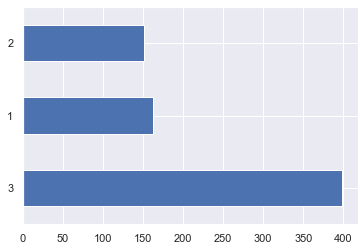

In [16]:
# Comes from new feature eng book.
# So many options...
qa_above = x_train.copy()
qa_above['t'] = y_train

#qa_above['Pclass'].value_counts().plot(kind='bar')
#qa_above['Pclass'].value_counts().plot(kind='pie')
#qa_above['Pclass'].value_counts().plot(kind='hist')
#qa_above['Pclass'].value_counts().plot(kind='box')
qa_above['Pclass'].value_counts().plot(kind='barh')

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

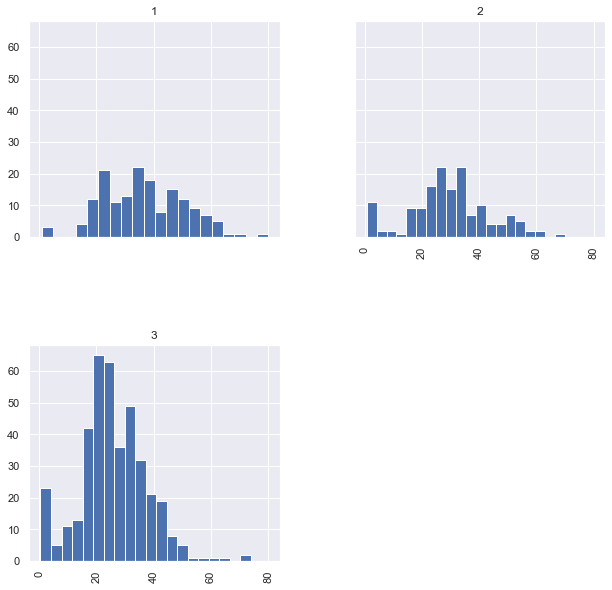

In [17]:
# Comes from new feature eng book.
# Multiple visuals in one
qa_above = x_train.copy()
qa_above['t'] = y_train

qa_above['Age'].hist(by=qa_above['Pclass'],
sharex=True, sharey=True,
figsize=(10, 10),
bins=20)

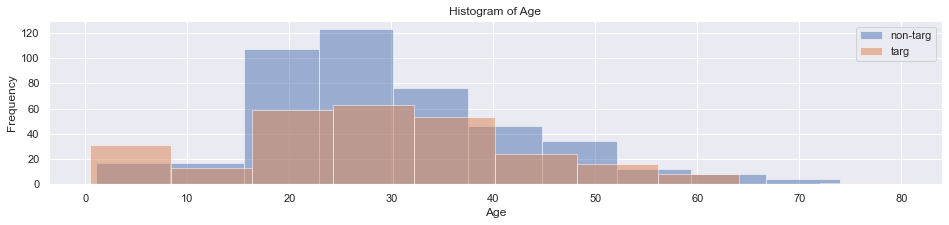

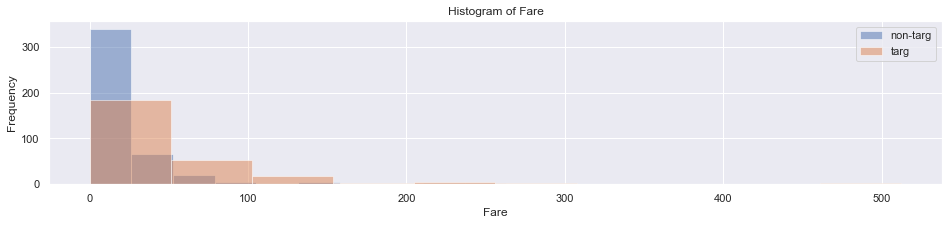

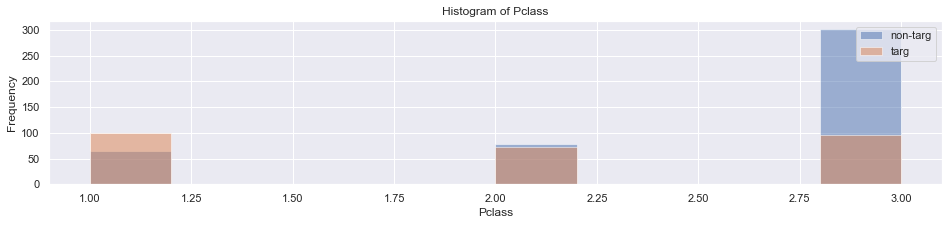

In [27]:
# Comes from new feature eng book.
pima = x_train.copy()
pima['targ'] = y_train
for col in ['Age', 'Fare', 'Pclass']:
    plt.hist(pima[pima['targ']==0][col], 10, alpha=0.5, label='non-targ')
    plt.hist(pima[pima['targ']==1][col], 10, alpha=0.5, label='targ')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

/var/folders/vq/_28t1jmn05gd80_d1hcf49c5fx8938/T/ipykernel_2987/4061843806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_['targ'] = y_train


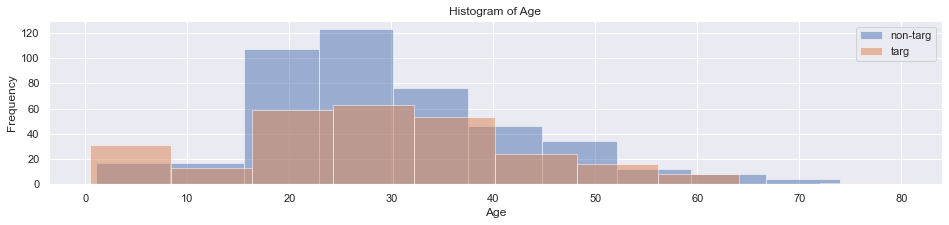

In [23]:
# Comes from new feature eng book.
plt.rcParams["figure.figsize"] = (16,3)
hist_ = x_train[['Age']]
hist_['targ'] = y_train

col = 'Age'
plt.hist(hist_[hist_['targ']==0][col], 10, alpha=0.5, label='non-targ')
plt.hist(hist_[hist_['targ']==1][col], 10, alpha=0.5, label='targ')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

/var/folders/vq/_28t1jmn05gd80_d1hcf49c5fx8938/T/ipykernel_2987/3882371811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_['targ'] = y_train


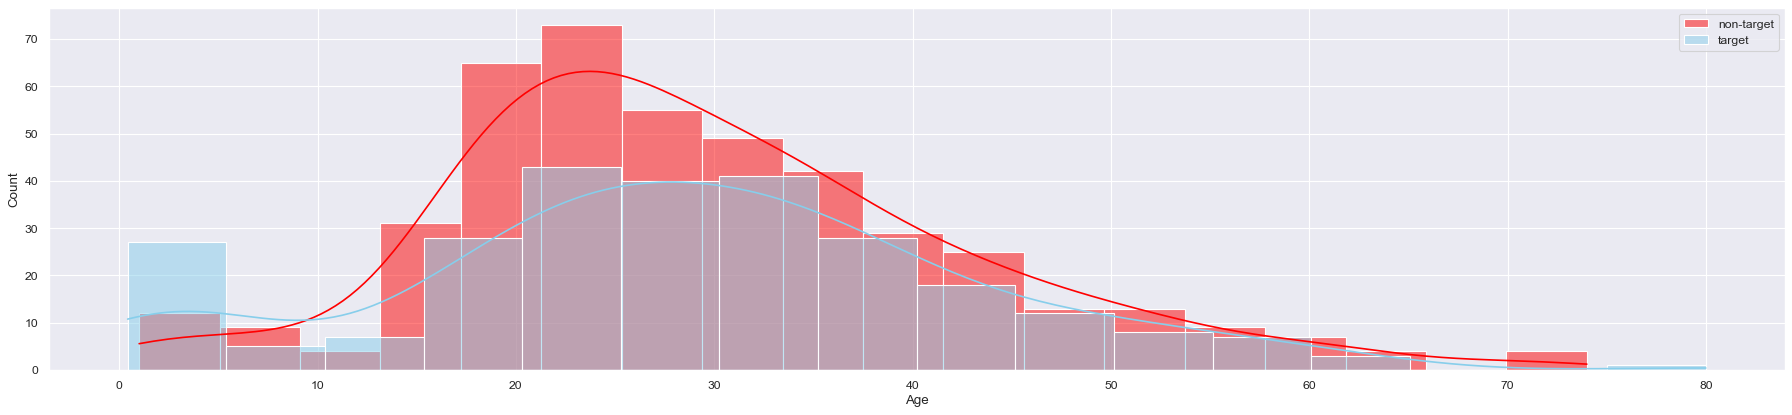

In [25]:
# Can't recall source
# Hist with two target split between 1 & 0
hist_ = x_train[['Age']]
hist_['targ'] = y_train

hist_0 = hist_[hist_['targ']==0]
hist_1 = hist_[hist_['targ']==1]

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(28, 6), dpi=80)
sns.set(style="darkgrid")
sns.histplot(data=hist_0, x="Age", color="red", label="non-target", kde=True)
sns.histplot(data=hist_1, x="Age", color="skyblue", label="target", kde=True)
plt.legend() 
plt.show()

In [18]:
# Look at survival rate range of col
# (remember; gender was recoded as: genders = {"male":0, "female":1})
# Works if targ is binary (1, 0), i.e.
# Pclass=1 + Sex=1 = 70 pasengers. 67 survived (1) & 3 did not (0) the average of across that group is .957143
df_ = x_train.copy()
df_['targ'] = y_train
df_.pivot_table('targ', index=['Pclass', 'Sex'], aggfunc=['count','mean'])

count      mean
            targ      targ
Pclass Sex                
1      0      93  0.344086
       1      70  0.957143
2      0      91  0.164835
       1      60  0.966667
3      0     283  0.141343
       1     115  0.486957

In [20]:
df_.pivot_table('Pclass', index='Sex', columns='targ', aggfunc='count')

targ,0,1
Sex,,
0,380,87
1,64,181
